<h2 style='color:blue' align="center">KNN (K Nearest Neighbors) Classification: Machine Tutorial Using Python Sklearn</h2>

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

<img height=300 width=300 src="iris_petal_sepal.png" />

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [30]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [31]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [32]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [33]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [34]:
df[45:55]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target flower_name  
45       0      setosa  
46       0      setosa  
47       0      setosa  
48       0      setosa  
49       0      setosa  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor

In [35]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

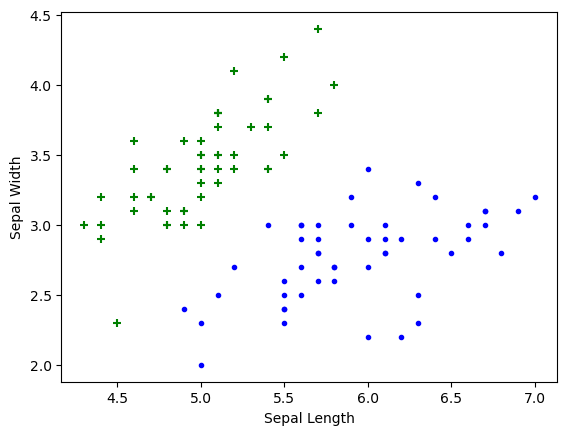

In [37]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

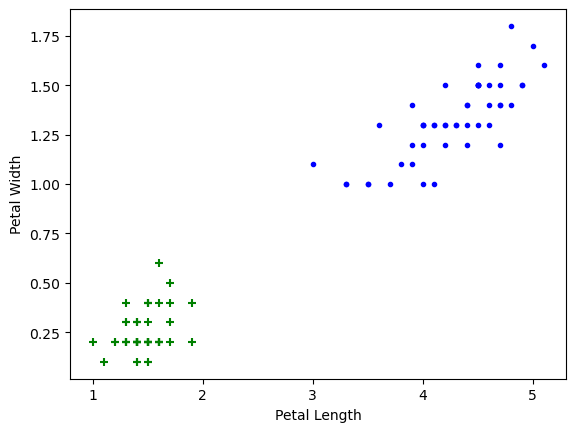

In [38]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train test split**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [42]:
len(X_train)

120

In [43]:
len(X_test)

30

**Create KNN (K Neighrest Neighbour Classifier)**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.score(X_test, y_test)

C:\Users\ENET29\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1.0

In [58]:
knn.predict([[4.8,3.0,1.5,0.3]])

C:\Users\ENET29\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

**Plot Confusion Matrix**

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

C:\Users\ENET29\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

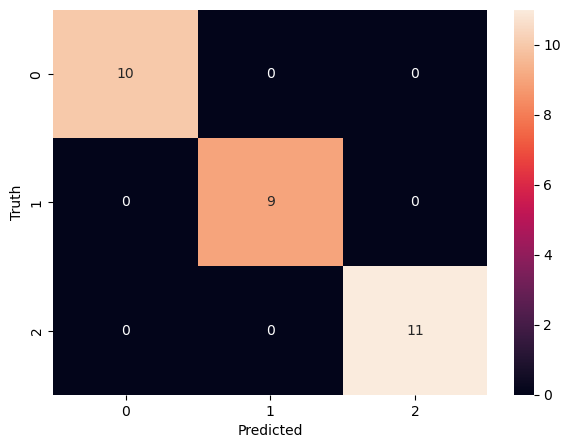

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Do not forget to work on exercise, exercise link is below** 

https://github.com/codebasics/py/blob/master/ML/17_knn_classification/knn_exercise.md


In [65]:
import tkinter as tk
from tkinter import ttk
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


def train_and_evaluate():
    k_value = int(k_entry.get())
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result_label.config(text=f'Accuracy: {accuracy:.2f}')


root = tk.Tk()
root.title("k-Nearest Neighbors Classifier")


k_label = ttk.Label(root, text="Enter the value of k:")
k_label.pack(pady=10)


k_entry = ttk.Entry(root)
k_entry.pack()

classify_button = ttk.Button(root, text="Classify", command=train_and_evaluate)
classify_button.pack(pady=10)


result_label = ttk.Label(root, text="")
result_label.pack()

 
root.mainloop()